# Isomap Dimensionality Reduction on Vegetable and Fruit Data

### DSCI 475 - Topological Data Analysis Final Project

Data Source: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=train

In [1]:
# Importing packages
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from sklearn import manifold  # dimensionality reduction
import glob # file handling
import math # math functions
from PIL import Image # image processing

In [2]:
# Vegtables and fruits (veggies) data
veggieFolders = glob.glob('Veg/*')
veggieFolders = [x + '/*.jpg' for x in veggieFolders]
veggies = [x.split('/')[1] for x in veggieFolders]
print(len(veggies),  'vegetables and fruits found')
print("Veggies: ", veggies)
path = 'Veg/'
# print(veggieFolders)

36 vegetables and fruits found
Veggies:  ['apple', 'turnip', 'chilli pepper', 'raddish', 'bell pepper', 'pear', 'sweetpotato', 'pomegranate', 'peas', 'capsicum', 'spinach', 'lettuce', 'kiwi', 'lemon', 'onion', 'cauliflower', 'potato', 'jalepeno', 'sweetcorn', 'cucumber', 'paprika', 'watermelon', 'mango', 'cabbage', 'grapes', 'beetroot', 'eggplant', 'corn', 'soy beans', 'banana', 'ginger', 'garlic', 'pineapple', 'tomato', 'orange', 'carrot']


In [3]:
# importing data

num_images_per_veggie = 4
samples = [] # samples

for folder in veggieFolders: # for each veggie folder
    # print(folder)
    imageNum = 0
    for filename in glob.glob(folder): # get all images in the folder
        imageNum += 1
        img = Image.open(filename).convert('L') # convert to grayscale
        img = img.resize((200,200),Image.ANTIALIAS) # resize to 200x200
        samples.append(np.array(img).reshape(-1)) # flatten image and add to samples
        # if imageNum == num_images_per_veggie:
        #     break

/var/folders/4q/h6mrxg6x5tn0mwqnw8_b8jtr0000gn/T/ipykernel_43862/3248645669.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((200,200),Image.ANTIALIAS) # resize to 200x200


In [4]:
print("Number of images: ", len(samples))

Number of images:  334


In [5]:
samples

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([ 71,  68,  65, ..., 102, 104, 109], dtype=uint8),
 array([ 52,  52,  52, ..., 115, 114, 114], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([242, 242, 243, ..., 248, 247, 247], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([135, 135, 135, ..., 182, 181, 181], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([100,  99,  98, ...,  30,  28,  24], dtype=uint8),
 array([141, 140, 140, ..., 190, 191, 191], dtype=uint8),
 array([ 33,  18,  18, ..., 153, 145, 148], dtype=uint8),
 array([201, 205, 208, ...,  65,  69,  41], dtype=uint8),
 array([184, 111,  79, ...,  43,  38,  40], dtype=uint8),
 array([235, 217, 191, ...,  10,  11,   8], dtype=uint8),
 array([141, 140, 140, ..., 190, 191, 191], dtype=uint8),
 array([142, 138, 134, ..., 120, 162, 164], dtype=uint8),
 array([ 89, 103, 112, ..., 120, 127, 120], dtype=uint8),
 array([255, 255, 255, ...

In [6]:
df = pd.DataFrame.from_records(samples, coerce_float=True) # create dataframe
num_images, num_pixels = df.shape # get shape
pixels_per_dimension = int(math.sqrt(num_pixels)) # get pixels per dimension

In [7]:
iso = manifold.Isomap(n_neighbors=5, n_components=2) # create isomap
iso.fit(df) # fit model
manifold_2Da = iso.transform(df) # transform data
manifold_2D = pd.DataFrame(manifold_2Da, columns=['component1', 'component2']) # create dataframe
manifold_2D.head()

,component1,component2
0,41343.687762,24136.947032
1,-43038.710798,-5974.205026
2,-32426.182820,-4678.772911
3,1601.290232,-10711.426195
4,32433.658696,37457.832998


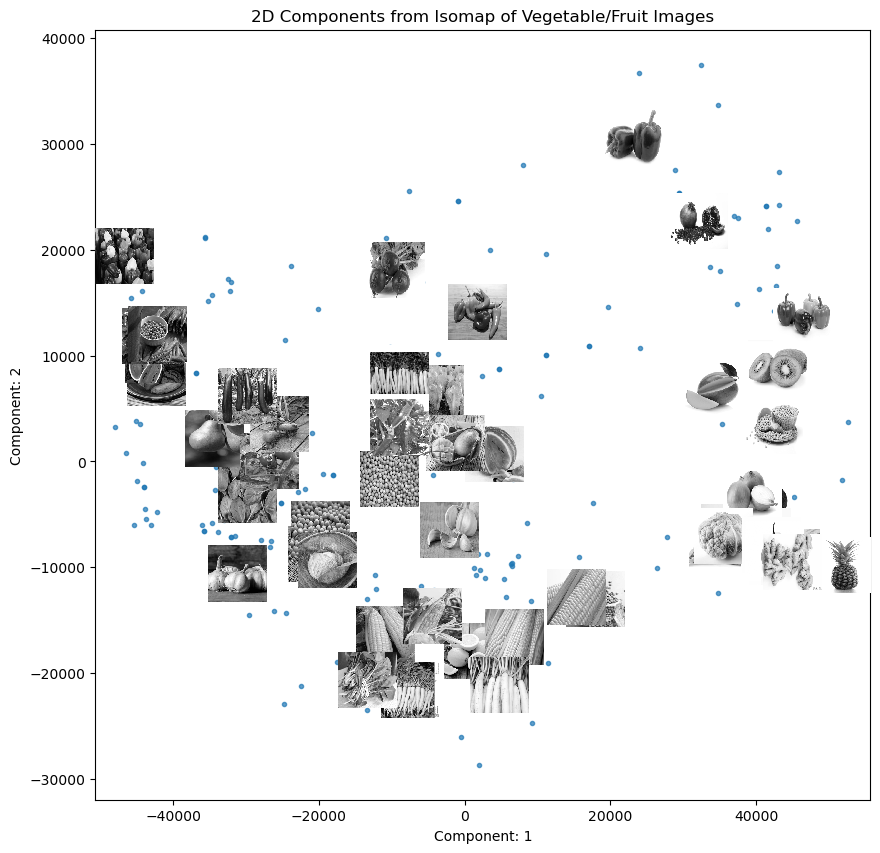

In [8]:
%matplotlib inline
np.random.seed(2)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Vegetable/Fruit Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['component1']) - min(manifold_2D['component1'])) * 0.08
y_size = (max(manifold_2D['component2']) - min(manifold_2D['component2'])) * 0.08
for i in range(60):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'component1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'component2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'component1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'component2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['component1'], manifold_2D['component2'], marker='.',alpha=0.7)
plt.show()